In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from f1_utils import ctich_f1

root_dir = "../../"

data_dir = os.path.join(root_dir, "data")
ctich_dir = os.path.join(data_dir, "CT-ICH")
image_dir = os.path.join(ctich_dir, "images")
mask_dir = os.path.join(ctich_dir, "masks")
figure_dir = os.path.join(root_dir, "figures", "image_level")
os.makedirs(figure_dir, exist_ok=True)

sns.set_theme()
sns.set_context("paper", font_scale=1.5)

In [2]:
if not os.path.exists(os.path.join(ctich_dir, "explanations", "image_level_f1")):
    ctich_f1()
f1_df = pd.read_pickle(os.path.join(ctich_dir, "explanations", "image_level_f1"))

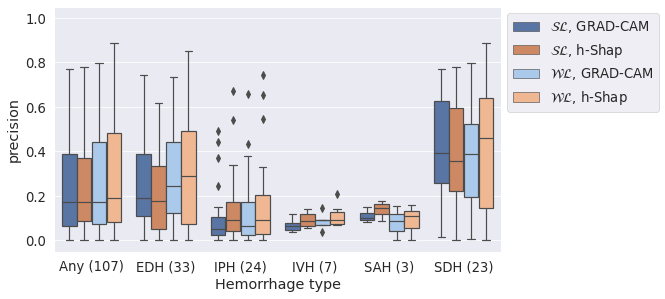

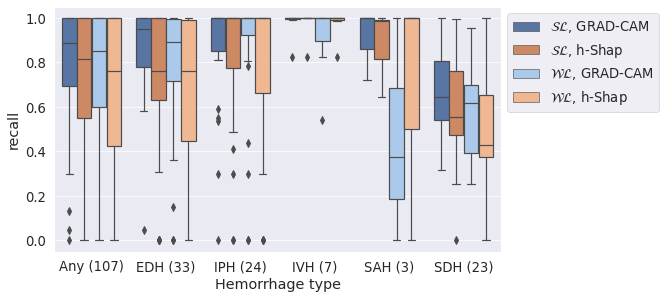

In [3]:
from scipy.stats import iqr

df = f1_df.explode("hemorrhage_types", ignore_index=True)

for metric, name in [
    ("f1", "Dice score"),
    ("precision", "precision"),
    ("recall", "recall"),
]:
    _, ax = plt.subplots(figsize=(16 / 2, 9 / 2))
    ax = sns.boxplot(
        data=df.explode("hemorrhage_types", ignore_index=True),
        x="hemorrhage_types",
        y=metric,
        hue="model_explainer",
        ax=ax,
        palette=sns.color_palette()[:2] + sns.color_palette("pastel")[:2],
        order=sorted(pd.unique(df["hemorrhage_types"])),
    )
    ax.set_xlabel("Hemorrhage type")
    ax.set_ylabel(name)
    ax.set_ylim(-0.05, 1.05)
    xticklabels = ax.get_xticklabels()
    for tick in xticklabels:
        hem_type = tick.get_text()
        tick.set_text(
            f"{hem_type} ({len(df[df['hemorrhage_types'] == hem_type]) // 4})"
        )
    ax.set_xticklabels(xticklabels)
    ax.legend(title="", loc="upper left", bbox_to_anchor=(1, 1))

    plt.savefig(
        os.path.join(figure_dir, f"CT-ICH_{metric}_ICH_type.jpg"), bbox_inches="tight"
    )
    plt.savefig(
        os.path.join(figure_dir, f"CT-ICH_{metric}_ICH_type.pdf"), bbox_inches="tight"
    )
    plt.show()

In [4]:
median_iqr_df = df.groupby(["hemorrhage_types", "model_explainer"]).agg(
    {"f1": ["median", iqr]}
)
median_iqr_df

f1          
                                             median       iqr
hemorrhage_types model_explainer                             
Any              $\mathcal{SL}$, GRAD-CAM  0.294640  0.415288
                 $\mathcal{SL}$, h-Shap    0.287300  0.284697
                 $\mathcal{WL}$, GRAD-CAM  0.290331  0.341648
                 $\mathcal{WL}$, h-Shap    0.316595  0.380905
EDH              $\mathcal{SL}$, GRAD-CAM  0.317031  0.339788
                 $\mathcal{SL}$, h-Shap    0.294097  0.394124
                 $\mathcal{WL}$, GRAD-CAM  0.387855  0.391552
                 $\mathcal{WL}$, h-Shap    0.433569  0.457263
IPH              $\mathcal{SL}$, GRAD-CAM  0.095813  0.139615
                 $\mathcal{SL}$, h-Shap    0.167440  0.220166
                 $\mathcal{WL}$, GRAD-CAM  0.118403  0.238314
                 $\mathcal{WL}$, h-Shap    0.167339  0.279191
IVH              $\mathcal{SL}$, GRAD-CAM  0.120072  0.050937
                 $\mathcal{SL}$, h-Shap    0.159529  0.094522
                 $\mathcal{WL}$, GRAD-CAM  0.169046  0.037987
                 $\mathcal{WL}$, h-Shap    0.166539  0.088363
SAH              $\mathcal{SL}$, GRAD-CAM  0.180418  0.053216
                 $\mathcal{SL}$, h-Shap    0.255690  0.057516
                 $\mathcal{WL}$, GRAD-CAM  0.139576  0.132507
                 $\mathcal{WL}$, h-Shap    0.198271  0.136954
SDH              $\mathcal{SL}$, GRAD-CAM  0.460734  0.213221
                 $\mathcal{SL}$, h-Shap    0.404800  0.251810
                 $\mathcal{WL}$, GRAD-CAM  0.399170  0.176885
                 $\mathcal{WL}$, h-Shap    0.444842  0.301560

In [5]:
worst_df = df.loc[df.groupby(["hemorrhage_types", "model_explainer"])["f1"].idxmin()]

for _, data in worst_df.iterrows():
    print(
        data["hemorrhage_types"],
        data["model"],
        data["explainer"],
        data["patient_number"],
        data["slice_idx"] + 1,
        data["f1"],
    )

Any $\mathcal{SL}$ GRAD-CAM 50 16 0.0
Any $\mathcal{SL}$ h-Shap 74 22 0.0
Any $\mathcal{WL}$ GRAD-CAM 66 24 0.0
Any $\mathcal{WL}$ h-Shap 66 24 0.0
EDH $\mathcal{SL}$ GRAD-CAM 78 16 0.004888100829060238
EDH $\mathcal{SL}$ h-Shap 78 14 0.0
EDH $\mathcal{WL}$ GRAD-CAM 66 24 0.0
EDH $\mathcal{WL}$ h-Shap 66 24 0.0
IPH $\mathcal{SL}$ GRAD-CAM 50 16 0.0
IPH $\mathcal{SL}$ h-Shap 50 16 0.0
IPH $\mathcal{WL}$ GRAD-CAM 76 34 0.0
IPH $\mathcal{WL}$ h-Shap 76 34 0.0
IVH $\mathcal{SL}$ GRAD-CAM 80 18 0.07189843717266518
IVH $\mathcal{SL}$ h-Shap 80 17 0.10899063019021654
IVH $\mathcal{WL}$ GRAD-CAM 85 21 0.06850182704019489
IVH $\mathcal{WL}$ h-Shap 80 17 0.1304085177074681
SAH $\mathcal{SL}$ GRAD-CAM 76 37 0.15172377129794531
SAH $\mathcal{SL}$ h-Shap 84 33 0.16222695791156103
SAH $\mathcal{WL}$ GRAD-CAM 76 37 0.0
SAH $\mathcal{WL}$ h-Shap 76 37 0.0
SDH $\mathcal{SL}$ GRAD-CAM 74 22 0.03288861309339125
SDH $\mathcal{SL}$ h-Shap 74 22 0.0
SDH $\mathcal{WL}$ GRAD-CAM 74 22 0.010236976154735832
SDH